In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!ls

Untitled.ipynb        test.csv
sample_submission.csv train.csv


In [9]:
train = pd.read_csv('./train.csv', index_col='id')
test = pd.read_csv('./test.csv', index_col='id')

In [10]:
original = pd.read_csv('./original.csv')
train = pd.concat([train, original], ignore_index=True)

display(train)

surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate   
0        yes  adult           530001         38.1  132.0              24.0  \
1        yes  adult           533836         37.5   88.0              12.0   
2        yes  adult           529812         38.3  120.0              28.0   
3        yes  adult          5262541         37.1   72.0              30.0   
4         no  adult          5299629         38.0   52.0              48.0   
...      ...    ...              ...          ...    ...               ...   
1529     yes  adult           533886          NaN  120.0              70.0   
1530      no  adult           527702         37.2   72.0              24.0   
1531     yes  adult           529386         37.5   72.0              30.0   
1532     yes  adult           530612         36.5  100.0              24.0   
1533     yes  adult           534618         37.2   40.0              20.0   

     temp_of_extremities peripheral_pulse mucous_membrane   
0                   cool          reduced   dark_cyanotic  \
1                   cool           normal   pale_cyanotic   
2                   cool          reduced       pale_pink   
3                   cold          reduced       pale_pink   
4                 normal           normal     normal_pink   
...                  ...              ...             ...   
1529                cold              NaN   pale_cyanotic   
1530                cool        increased   pale_cyanotic   
1531                cold          reduced   pale_cyanotic   
1532                cool          reduced       pale_pink   
1533                 NaN              NaN             NaN   

     capillary_refill_time  ... packed_cell_volume total_protein   
0               more_3_sec  ...               57.0           8.5  \
1               more_3_sec  ...               33.0          64.0   
2               less_3_sec  ...               37.0           6.4   
3               more_3_sec  ...               53.0           7.0   
4               less_3_sec  ...               47.0           7.3   
...                    ...  ...                ...           ...   
1529            more_3_sec  ...               55.0          65.0   
1530            more_3_sec  ...               44.0           NaN   
1531            less_3_sec  ...               60.0           6.8   
1532            less_3_sec  ...               50.0           6.0   
1533                   NaN  ...               36.0          62.0   

     abdomo_appearance abdomo_protein surgical_lesion  lesion_1 lesion_2   
0        serosanguious            3.4             yes      2209        0  \
1        serosanguious            2.0             yes      2208        0   
2        serosanguious            3.4             yes      5124        0   
3               cloudy            3.9             yes      2208        0   
4               cloudy            2.6              no         0        0   
...                ...            ...             ...       ...      ...   
1529               NaN            NaN              no      3205        0   
1530     serosanguious            3.3             yes      2208        0   
1531               NaN            NaN             yes      3205        0   
1532     serosanguious            3.4             yes      2208        0   
1533             clear            1.0              no      6112        0   

     lesion_3  cp_data     outcome  
0           0       no        died  
1           0       no  euthanized  
2           0       no       lived  
3           0      yes       lived  
4           0      yes       lived  
...       ...      ...         ...  
1529        0       no  euthanized  
1530        0      yes  euthanized  
1531        0       no        died  
1532        0      yes       lived  
1533        0       no  euthanized  

[1534 rows x 28 columns]

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                1534 non-null   object 
 1   age                    1534 non-null   object 
 2   hospital_number        1534 non-null   int64  
 3   rectal_temp            1474 non-null   float64
 4   pulse                  1510 non-null   float64
 5   respiratory_rate       1476 non-null   float64
 6   temp_of_extremities    1439 non-null   object 
 7   peripheral_pulse       1405 non-null   object 
 8   mucous_membrane        1466 non-null   object 
 9   capillary_refill_time  1496 non-null   object 
 10  pain                   1435 non-null   object 
 11  peristalsis            1470 non-null   object 
 12  abdominal_distention   1455 non-null   object 
 13  nasogastric_tube       1350 non-null   object 
 14  nasogastric_reflux     1407 non-null   object 
 15  naso

In [16]:
train.isnull().sum().sort_values(ascending=False)

abdomen                  331
rectal_exam_feces        292
nasogastric_reflux_ph    246
abdomo_appearance        213
abdomo_protein           198
nasogastric_tube         184
peripheral_pulse         129
nasogastric_reflux       127
pain                      99
temp_of_extremities       95
abdominal_distention      79
mucous_membrane           68
peristalsis               64
rectal_temp               60
respiratory_rate          58
capillary_refill_time     38
total_protein             33
packed_cell_volume        29
pulse                     24
lesion_1                   0
lesion_3                   0
cp_data                    0
lesion_2                   0
surgery                    0
surgical_lesion            0
age                        0
hospital_number            0
outcome                    0
dtype: int64

In [26]:
train.describe()

hospital_number  rectal_temp        pulse  respiratory_rate   
count     1.534000e+03  1474.000000  1510.000000       1476.000000  \
mean      9.804694e+05    38.196744    78.194702         30.120596   
std       1.392849e+06     0.779883    29.162518         16.650801   
min       5.184760e+05    35.400000    30.000000          8.000000   
25%       5.288060e+05    37.800000    52.000000         18.000000   
50%       5.298400e+05    38.200000    72.000000         28.000000   
75%       5.342592e+05    38.600000    96.000000         36.000000   
max       5.305629e+06    40.800000   184.000000         96.000000   

       nasogastric_reflux_ph  packed_cell_volume  total_protein   
count            1288.000000         1505.000000    1501.000000  \
mean                4.395963           49.011296      21.899534   
std                 1.939516           10.590426      26.813063   
min                 1.000000           23.000000       3.300000   
25%                 2.000000           42.000000       6.600000   
50%                 4.500000           48.000000       7.500000   
75%                 6.200000           55.000000      13.000000   
max                 7.500000           75.000000      89.000000   

       abdomo_protein      lesion_1     lesion_2     lesion_3  
count     1336.000000   1534.000000  1534.000000  1534.000000  
mean         3.271931   3798.817471    29.409387     4.320078  
std          1.621415   5429.907956   336.748319    97.624805  
min          0.100000      0.000000     0.000000     0.000000  
25%          2.000000   2124.000000     0.000000     0.000000  
50%          3.000000   2209.000000     0.000000     0.000000  
75%          4.300000   3205.000000     0.000000     0.000000  
max         10.100000  41110.000000  7111.000000  2209.000000

/var/folders/pm/wh4jwkpj6lvbjqpx5b9p68t00000gp/T/ipykernel_73752/765409853.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df[[col, 'source']], x=col, hue='source', ax=ax)


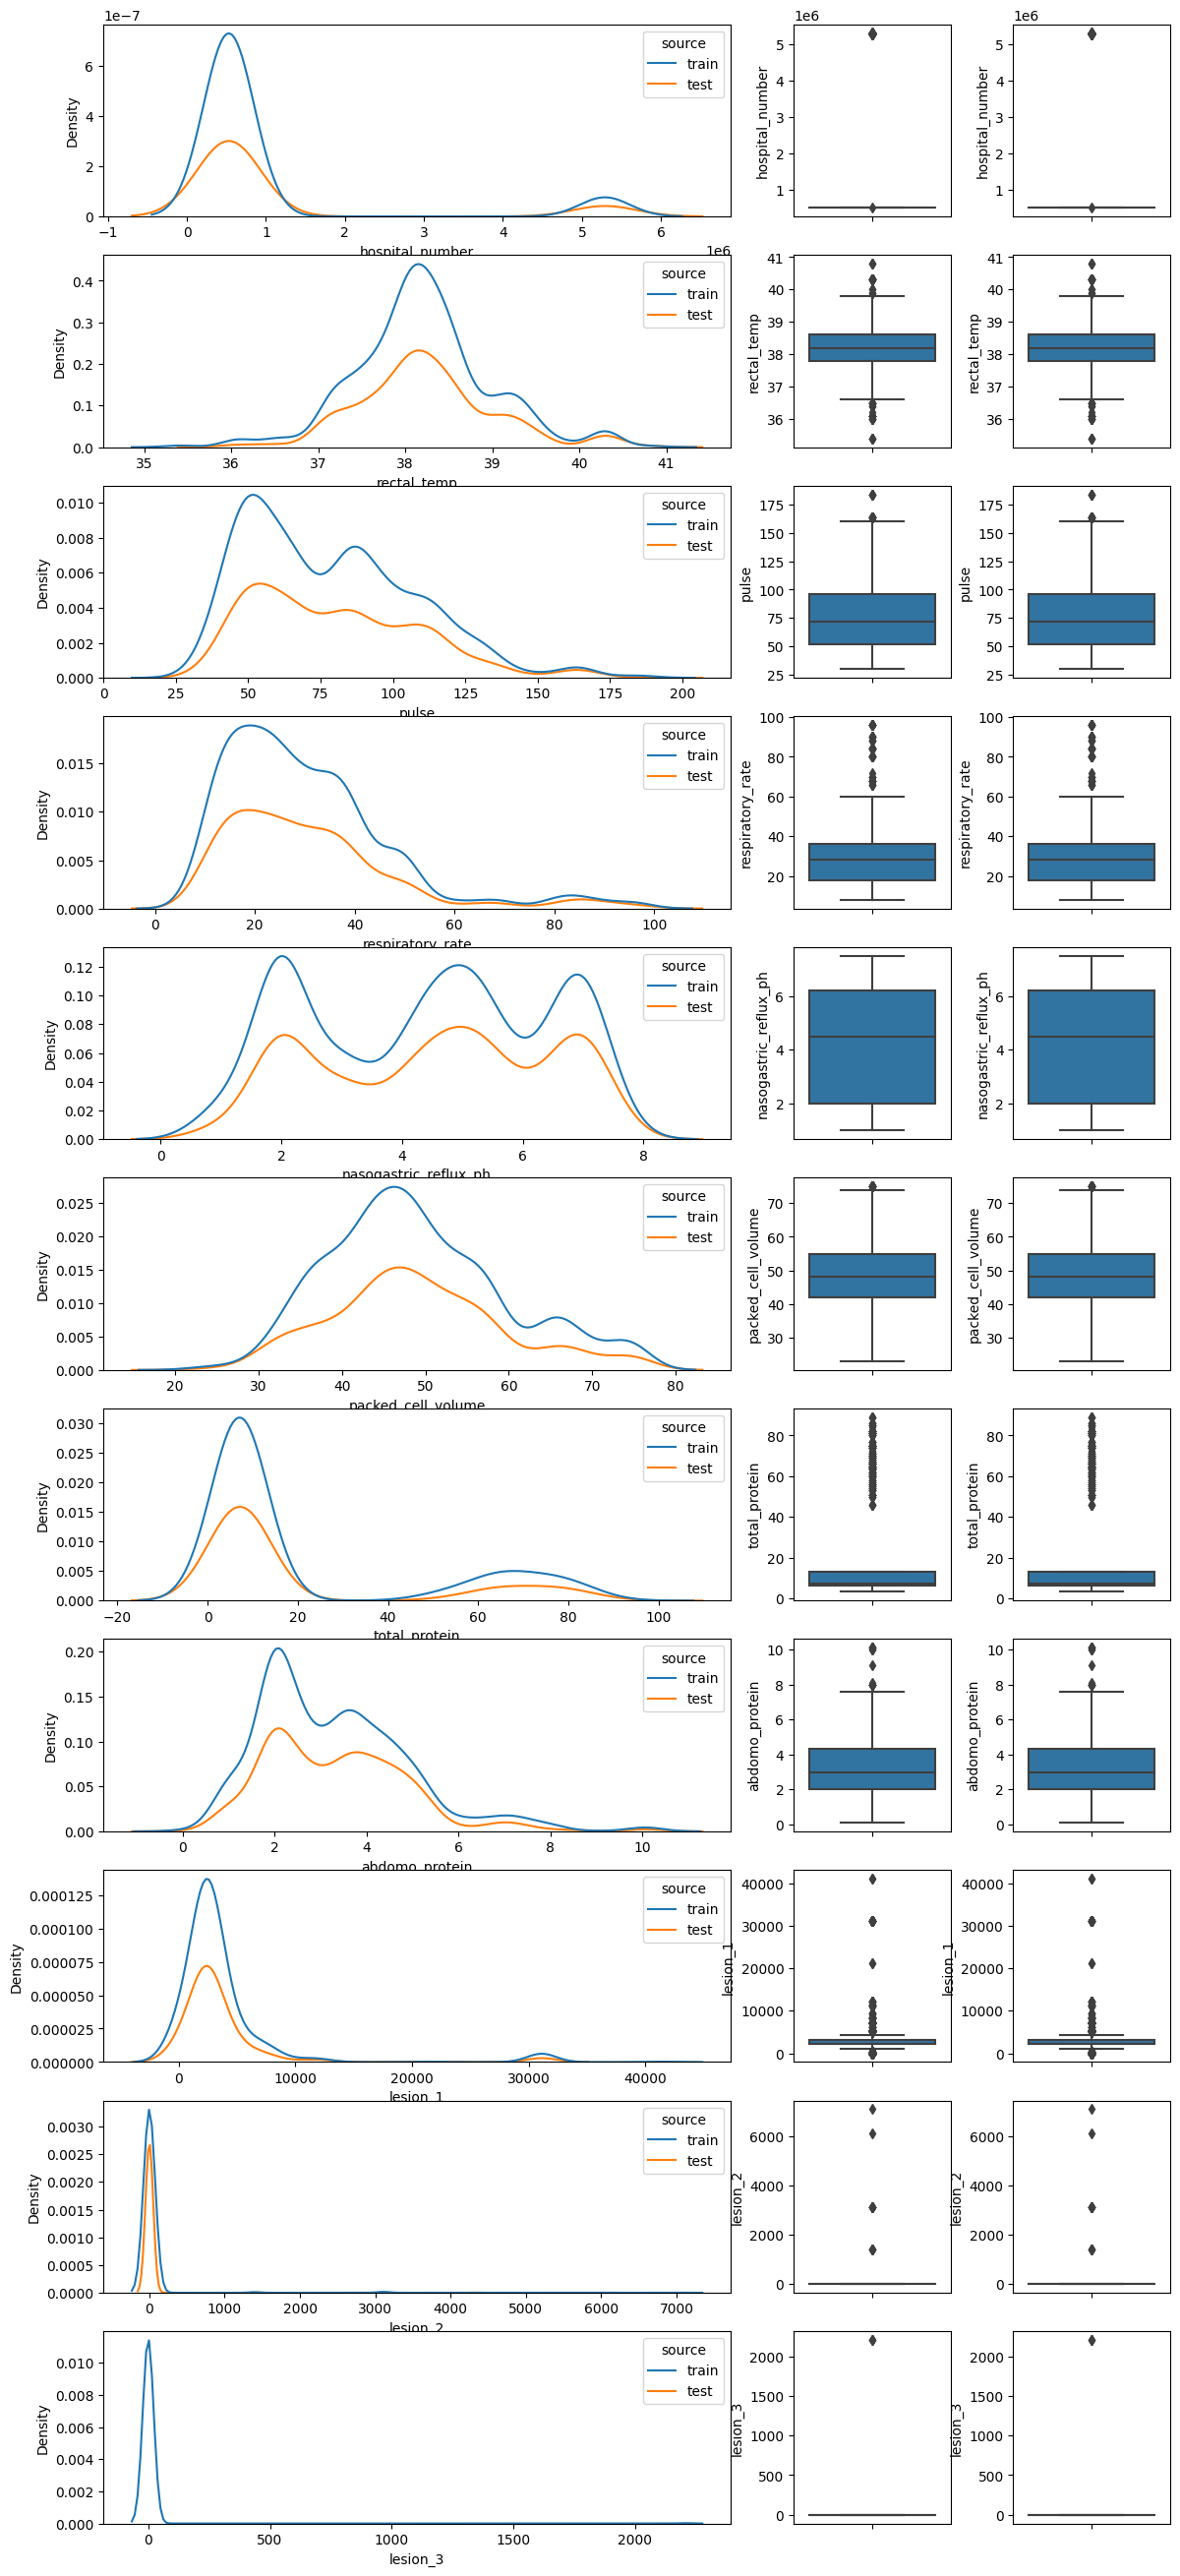

In [42]:
#カーネル密度分布による推定

num_columns = train.select_dtypes(include=[int, float]).columns
df = pd.concat([train[num_columns].assign(source='train'), test[num_columns].assign(source='test')], ignore_index=True)

fig, axes = plt.subplots(len(num_columns), 3, figsize=(14, len(num_columns)*3), gridspec_kw={'width_ratios': [4, 1, 1]})
for i, col in enumerate(num_columns):
    ax = axes[i, 0]
    sns.kdeplot(data=df[[col, 'source']], x=col, hue='source', ax=ax)
    
    ax = axes[i, 1]
    sns.boxplot(data=df[df['source'] == 'train'], y=col, ax=ax)
    
    ax = axes[i, 2]
    sns.boxplot(data=df[df['source'] == 'train'], y=col, ax=ax)

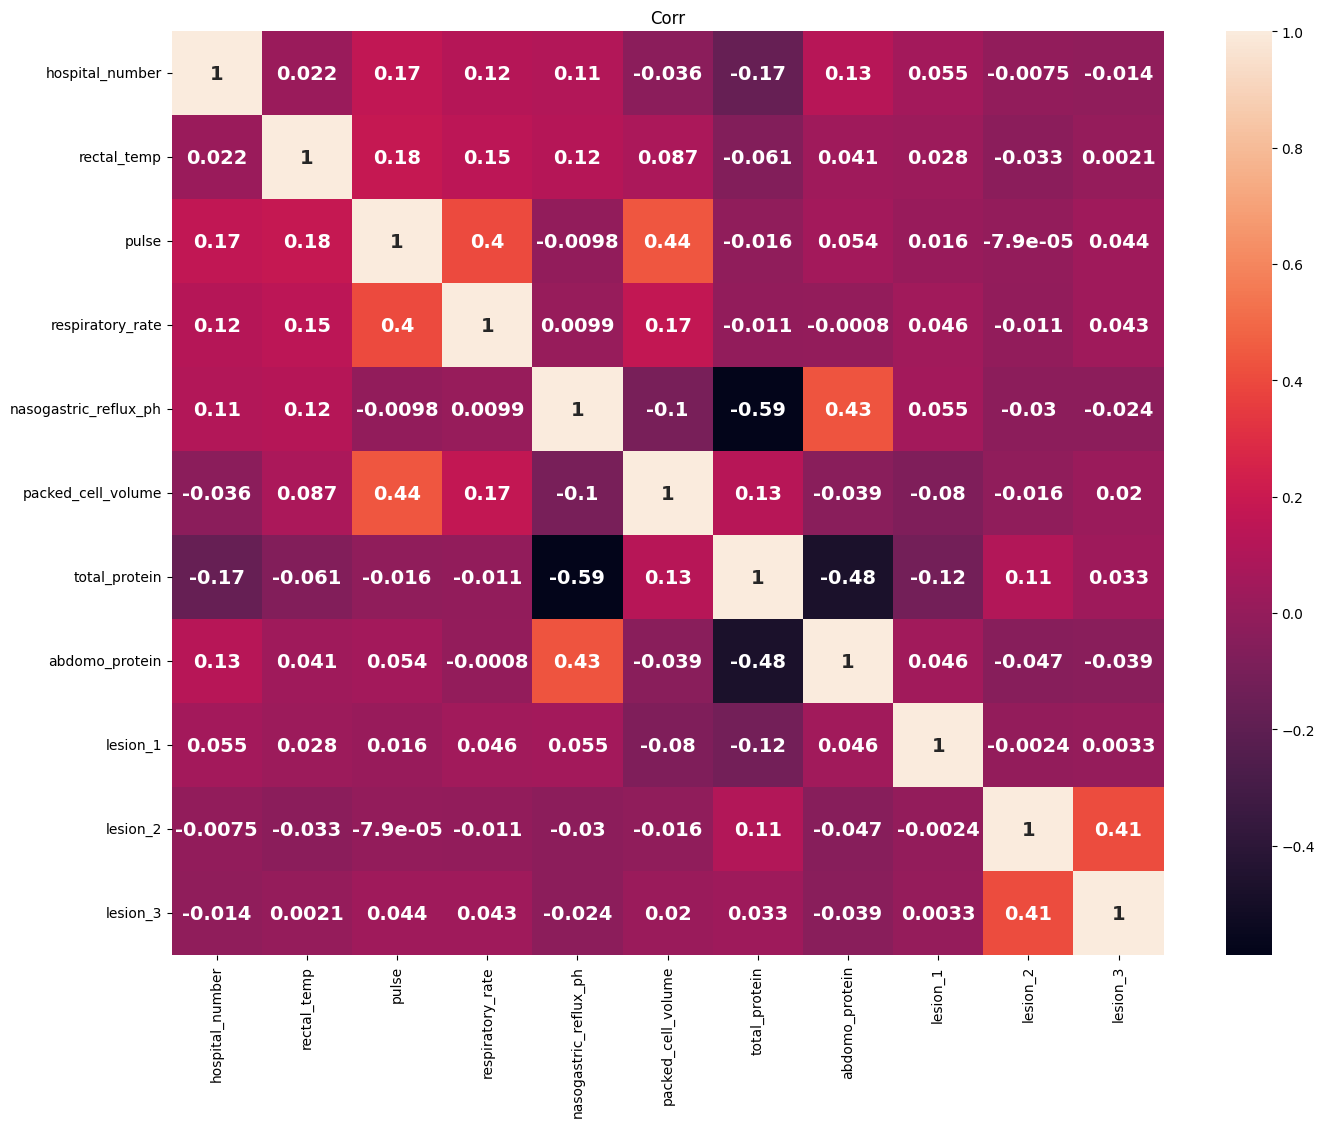

In [50]:
corr = train[num_columns].corr()

plt.figure(figsize=(16, 12))
sns.heatmap(data=corr, annot=True, annot_kws={'fontsize': 14, 'fontweight': 'bold'})
plt.title('Corr')
plt.show()

In [57]:
cat_columns

Index(['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'surgical_lesion',
       'cp_data', 'outcome'],
      dtype='object')

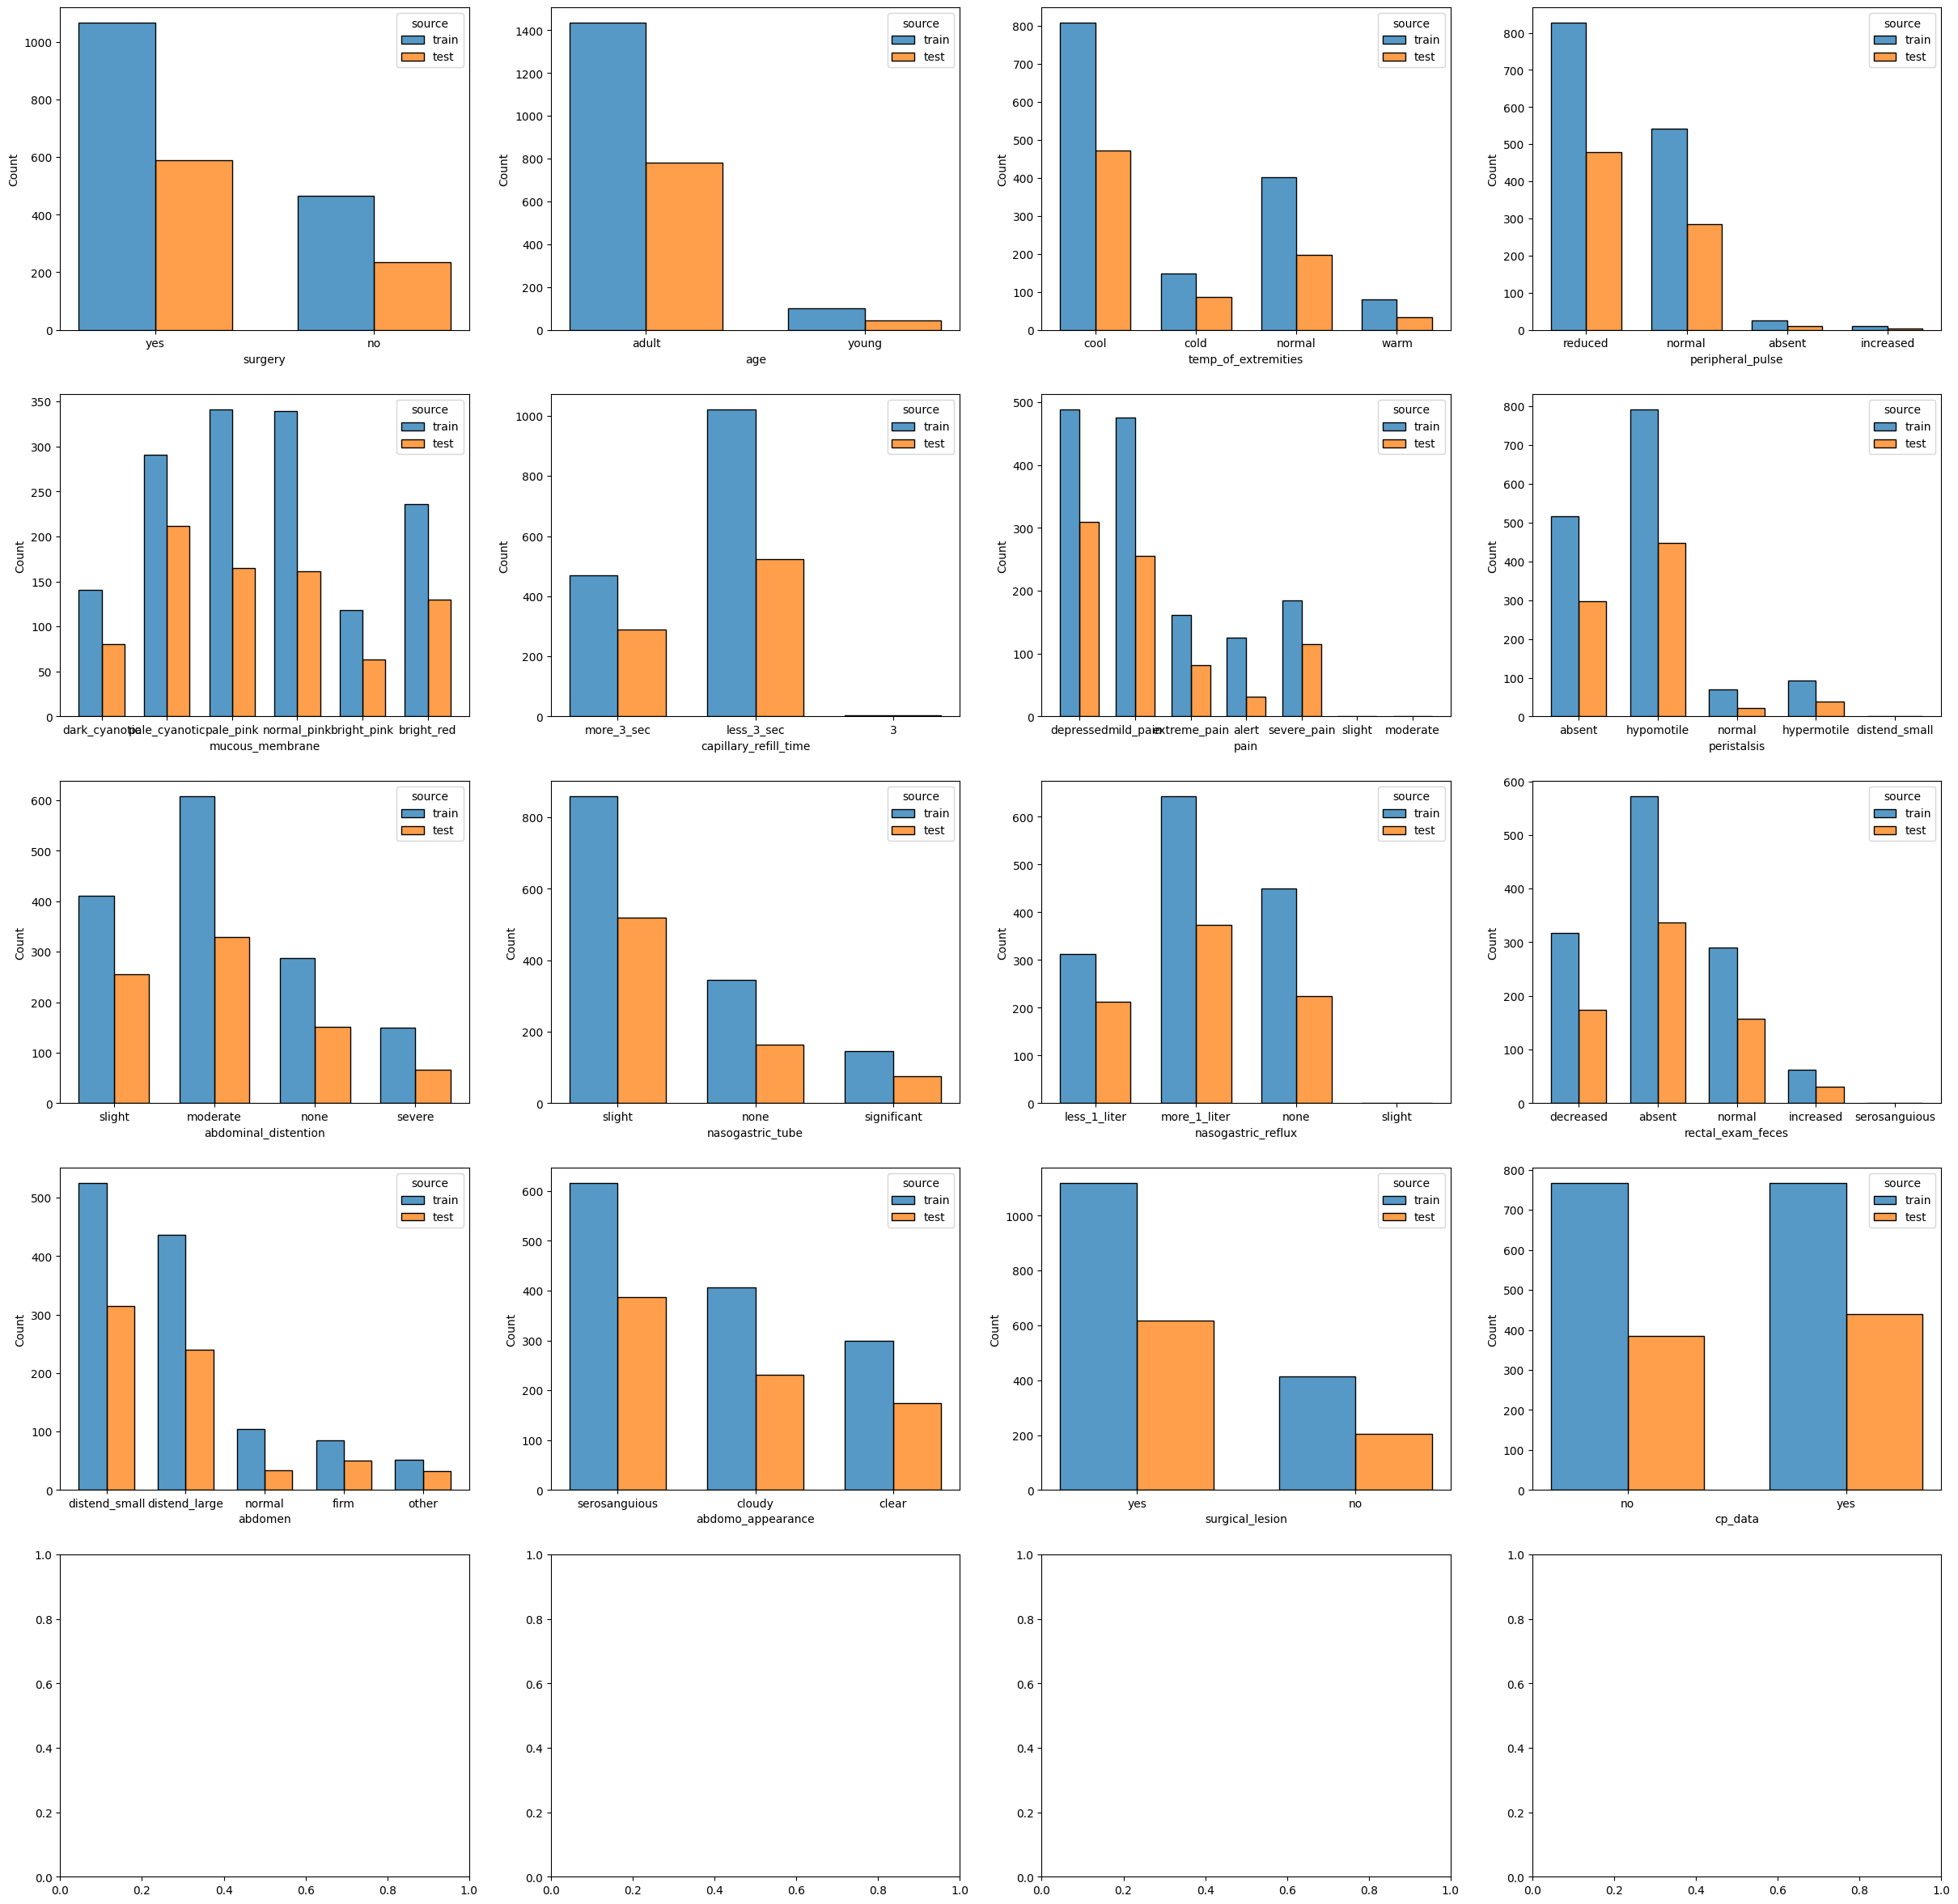

In [75]:
cat_columns = train.select_dtypes(include=['object']).columns.drop('outcome')
df_cat = pd.concat([train[cat_columns].assign(source = 'train'), test[cat_columns].assign(source='test')], ignore_index=True)

fig, axes = plt.subplots(len(cat_columns)//4+ 1, 4, figsize=(30, 30))

for i, col in enumerate(cat_columns):
    ax = axes[i//4, i%4]
    sns.histplot(df_cat[[col, 'source']], x=col, hue='source', multiple='dodge', shrink=.7, ax=ax)